## 1. Web scraping

Sometimes data is on the web but there is no API to grant access to it, the API is lacking functionalities or the terms of service are not adequate. In those cases because as humans we have visual access to the data we might wonder how to extract that data automatically. The discipline for doing so is **Web Scraping**. 

Before we start, it is useful to understand a little how web pages are created and data stored. In this section a brief introduction to web front-end development is presented. We will focus on two basic aspects:

+ Basic HTML + CSS static pages.
+ Dynamic HTML (a basic JavaScript example using JQuery).


### 1.1 Basic HTML + CSS 101

The most basic web pages are built upon HTML + CSS technology. This division stnds for content and design, respectively. **HTML (Hypertext markup language)** is used to give websites structure and stores the contents. This is our target for scraping. On the other hand **CSS (Cascading Style Sheets)** gives format to the content, sigles out content for visualization purposes, i.e. defines the style (e.g. font, color, family, borders, image style, relative positioning of the content, etc). HTML files include tags and references to style, thus it is worthwhile to understand a little bit of both technologies which can help us to scrap data more efficiently.


HTML is a tagged language usually rendered by a browser. Tags are specified in the following format:

<p style="text-align: center">&lt;tag_name *attributes*&gt; content &lt;/tag_name&gt;<p>

<p>
<div class = "alert alert-info" style = "border-radius:10px;border-width:3px;border-color:darkblue;font-family:Verdana,sans-serif;font-size:16px;">STRUCTURE of an HTML file:

<ul>
    <li> HTML files start with the <!DOCTYPE html>. This tells the browser that we will use HTML5. In former versions of HTML standard there were different versions. </li>
    <li> The first tag in a web page is &lt;html&gt; and its corresponding &lt;/html&gt; closing tag. All the web page is found inside these tags. </li>
    <li> HTML files have a &lt;head&gt; and a &lt;body&gt; </li>
    <li> In the head, we have the &lt;title&gt; tags, and we use this to specify the webpage's name. We can also find references to CSS stylesheets (&lt;link&gt;) used for formating the page and links to javascript files (&lt;script&gt;)that give the web page dynamic behavior.</li>
    <li> In the body we find the content of the page. </li> 
        <ul>
            <li> Headings and text paragraphs can be created using &lt;h#&gt; (# is a natural number) and &lt;p&gt; ,respectively. </li>
            <li> Hyperlinks (links) are given in the <strong>href</strong> attribute of the &lt;a&gt; (anchor) tag. </li>
            <li> Images can be embedded using the &lt;img&gt; tag and setting the <strong>src</strong> attribute to the resource. Caution: img is an special tag and it does not have a closing tag, e.g. &lt;img src = "my_pic.jpg" /&gt; </li>
        </ul>
</ul>
</div>
</p>

In [1]:
# %load files/example.html
<!DOCTYPE html>
<html>
	<head>
		<title>
			Basic knowledge for web scraping.
		</title>
	</head>
	<body>
		<h1>About HTML
		</h1>
		<p>Html (Hypertext markdown language) is the basic language to provide contents in the web. It is a tagged language. You can check more about it in <a href="http://www.w3.org/community/webed/wiki/HTML">World Wide Web Consortium.</a></p>

        <p> One of the following rubberduckies is clickable
	</p>
	<p>
            <img src = "files/rubberduck.jpg"/>

            <a href="http://www.pinterest.com/misscannabliss/rubber-duck-mania/"><img src = "files/rubberduck.jpg"/></a>
        </p>
	</body>
</html>


SyntaxError: invalid syntax (<ipython-input-1-32bdb2957d09>, line 2)

Because Ipython notebook cells directly interpret markdown and HTML we can use the cell as an interactive editor for our HTML understanding.


In [2]:
from IPython.core.display import HTML

HTML("files/example.html")

<div class = "alert alert-info" style = "border-radius:10px;border-width:3px;border-color:darkblue;font-family:Verdana,sans-serif;font-size:16px;">
**Old style HTML** static pages rely heavily on tables and lists: 

<ul>
<li> Making ordered and unordered lists is simple: *ol* (ordered list), *ul* (unordered list) are the main tags. Each item is inserted as *li* (list item) </li>
<li> *table* is the containing tag for building tables, each table row is given as *tr* and columns depend on the table data elements *td*. Tables may have a head (*thead*) and a body (*tbody*). *th* is the same as *td* but for the header. If you want a multi column cell then use colspan=number of cells to cover.
</li>
</ul>
</div>

The next example shows a simple table build. Check the markdown code.

<table>
<thead>
<tr><th colspan = 2>A table</th><tr>
</thead>
<tbody>
<tr>
<td>Hello I am element 1.1</td><td>Hello I am element 1.2</td>
</tr>
<tr>
<td colspan=2>Hello I am element 2.1 and 2.2</td>
</tr>
</tbody>
</table>

<div class = "alert alert-info" style = "border-radius:10px;border-width:3px;border-color:darkblue;font-family:Verdana,sans-serif;font-size:16px;">
**Current HTML** static pages rely heavily on containers and style: 

<ul>
<li> *div* stands for division and mark a block of content.
</li>
<li> *span* is used to single out an element of a block content.
</li>
</ul>

</div>

By themselves they are not much but when combined with the *style* attribute they become interesting.

For example, consider the following example of code:

<div style = "width:100px;height:100px;background-color:red;padding:10px;font-family:Verdana;font-size:24;color:pink;display:inline-block">  Box 1
</div>
<div style = "width:100px;height:100px;background-color:blue;padding:10px;font-family:Futura;font-size:24;color:lightblue;display:inline-block">  Box 2
</div>
<div style = "width:100px;height:100px;background-color:yellow;padding:10px;font-family:Garamond;font-size:24;color:orange;display:inline-block">  Box 3
</div>
<div style = "width:100px;height:100px;background-color:green;padding:10px;font-family:ArialNarrow;font-size:24;color:lightgreen;display:inline-block">  Box 4
</div>

The attribute *style* is also referred as *inline CSS* and let us give the skeleton some skin and makeup.

<div class = "alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

Let us build a basic HTML web page and check the magic of CSS in action before going in detail into CSS.
<ol>
<li>Create a file 'example2.html' using your favorite editor.</li>
<li>Fill the header and body basic HTML structure</li>
<li>Let us add three containers *div* in the body.</li> 
<li>Select one of them. This will be used as a navigation bar and will contain an unordered list with three elememnts: Home, Brief Bio, Hobbies</li>
<li>Select another division and create a table inside. Each row will contain information about your profile, e.g. the first row may contain Name: Your Name, the second row Position: Your current position, etc</li>
<li>The last one will contain an image of youself and a paragraph with your contact info (email)</li>
</ol>
<p>
Check the [result](files/example2.html). Nearly professional, doesn't it?
</p>
</div>

<div class = "alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

Let us add some style.
<ol>
<li>Add the class "navbar" as an attribute to the *div* containing the list. (eg. class = "navbar")</li>
<li>Add the class "head" to the *div* containing the image and the email.</li>
<li>Add the class "right" to the *div* containing the table.</li>
<li>Add the identifier "email" to the paragraph containing the email. (eg. id = "email")</li>
<li>Finally, let us link the class and ids definitions we have just writen by adding to the head tag the following line:
<p>< link type="text/css" rel="stylesheet" href="stylesheet.css"/ ></p>
</li>
</ol>
<p>
Check the [result](files/example2f.html) now. Do not forget to hover over your navigation bar.
</p>
</div>

The former exercise is an extremely simple exercise showing the separation between the content and the styling. Observe that the html file you have created does not have any explicit styling. However, we have added two new elements to the mix, classes and identifiers as attributes of the tags. As you can imagine styling rules are given for each class and ID and are compactly found on the stylesheet.css we have just linked.

<div class = "alert alert-warning" style = "border-radius:10px;border-width:3px;border-color:orange;font-family:Verdana,sans-serif;font-size:16px;">**COMMENT:**
Very simple formating can be also given using html markers. For example *strong* and *em* tags refers to bold and italics fonts.
</div>

### HTML Structure

The html document can be seen as a tree structure. The root of the tree is the *html* tag. This has two children *head* and *body*. Head may have different children such as *title*, *link*, or *script*. Body may have any combination of tags, *divs*, *p*, *a*, etc. These tags can be nested, e.g. we can find a *div* inside a *div* inside a *div*. In the example we have seen how to refer to nested elements. The elements can be html tags or classes or identifiers.
    + "elem1 elem2" refers to any elem2 inside any other elem1 disregarding the degree of nesting (it may have any arbitrary set of elementes in between both).
    + "elem1>elem2" specifically refers to any elem2 children of a direct parent with tag elem1.

#### Exploring HTML Strucuture using Inspection with your browser:

#### Dumping HTML file using request:

In [3]:
from urllib.request import urlopen
socket = urlopen("file:./files/example2f.html")
print('First time I pull from the socket\n')
print (socket.read())
print('\nSecond time I pull from the socket\n')
print(socket.read())

First time I pull from the socket

b'<!DOCTYPE html>\r\n<html>\r\n\t<head>\r\n\t\t<title>\r\n\t\t\tMy profile\r\n\t\t</title>\r\n\t\t<link type="text/css" rel="stylesheet" href="stylesheet.css"/>\r\n\t</head>\r\n\t<body>\r\n\t\t<div class = "navbar">\r\n\t\t\t<ul>\r\n\t\t\t\t<li>Home</li>\r\n\t\t\t\t<li>Short Bio</li>\r\n\t\t\t\t<li>Hobbies</li>\r\n\t\t\t</ul>\r\n\t\t</div>\r\n\t\t<div class = "right">\r\n\t\t\t<table>\r\n\t\t\t\t<tr><th>Name:</th><td>Rubber</td></tr>\r\n\t\t\t\t<tr><th>Profession:</th><td>Good fellow</td></tr>\r\n\t\t\t</table>\r\n\t\t</div>\r\n\t\t<div class = "head">\r\n\t\t\t<img src="rubberduck.jpg"/>\r\n\t\t\t<p id="email"> duckie@rubberduckies.com</p>\r\n\t\t</div>\r\n\t</body>\r\n</html>\r\n'

Second time I pull from the socket

b''


In [4]:
from urllib.request import urlopen
socket = urlopen("https://www.tiendeo.com/Catalogos/premia-de-mar/487392")
print (socket.read())

b'\r\n<!doctype html> <html lang="es-ES"> <head> <meta charset="utf-8"> <meta name="viewport" content="width=device-width" initial-scale="1.0" maximum-scale="1.0" user-scalable="0" /> <title>Carrefour | 2a unidad -50%</title> <meta name="description" content="2a unidad -50% - V\xc3\xa1lido del 13/03/2019 hasta el 27/03/2019" /> <link rel="manifest" href="/manifest.json"> <meta name="robots" content="noindex,follow" /> <link rel="icon" href="https://static0.tiendeo.com/images/es/favicon.ico">  <script> var _advertising; </script>  <style> .mdl-checkbox__ripple-container .mdl-ripple {\r\n background: #D2312E !important;\r\n}\r\n .mdl-button--raised.mdl-button--colored {\r\n background: #D2312E !important;\r\n}\r\n .mdl-button--raised {\r\n box-shadow: none !important;\r\n}\r\n #viewerCanvas{\r\n background: #ffffff !important;\r\n}\r\n .push-notification-overlay, .push-web-success {\r\n background-color: #D2312E !important;\r\n}\r\n .push-notification-overlay__content__text::before {\r\n

#### Find something directy in the HTML:



In [5]:
from urllib.request import urlopen
socket = urlopen("file:./files/example2f.html")
#convert bytes to src
#html = str(socket.read()) # Don't do it directly, or b' would be part of the string also
html = socket.read().decode()
html

'<!DOCTYPE html>\r\n<html>\r\n\t<head>\r\n\t\t<title>\r\n\t\t\tMy profile\r\n\t\t</title>\r\n\t\t<link type="text/css" rel="stylesheet" href="stylesheet.css"/>\r\n\t</head>\r\n\t<body>\r\n\t\t<div class = "navbar">\r\n\t\t\t<ul>\r\n\t\t\t\t<li>Home</li>\r\n\t\t\t\t<li>Short Bio</li>\r\n\t\t\t\t<li>Hobbies</li>\r\n\t\t\t</ul>\r\n\t\t</div>\r\n\t\t<div class = "right">\r\n\t\t\t<table>\r\n\t\t\t\t<tr><th>Name:</th><td>Rubber</td></tr>\r\n\t\t\t\t<tr><th>Profession:</th><td>Good fellow</td></tr>\r\n\t\t\t</table>\r\n\t\t</div>\r\n\t\t<div class = "head">\r\n\t\t\t<img src="rubberduck.jpg"/>\r\n\t\t\t<p id="email"> duckie@rubberduckies.com</p>\r\n\t\t</div>\r\n\t</body>\r\n</html>\r\n'

Questions we can do straight forward:
* Is there the word python in pyladies.org? (hint: find python in source)
* Does http://google.com contain an image? (hint: find < img TAG )
* What are the first ten characters of python.org? (hint: slice the html)

In [6]:
#TODO:
html[html.find('nav'):] # Old school scrapping

'navbar">\r\n\t\t\t<ul>\r\n\t\t\t\t<li>Home</li>\r\n\t\t\t\t<li>Short Bio</li>\r\n\t\t\t\t<li>Hobbies</li>\r\n\t\t\t</ul>\r\n\t\t</div>\r\n\t\t<div class = "right">\r\n\t\t\t<table>\r\n\t\t\t\t<tr><th>Name:</th><td>Rubber</td></tr>\r\n\t\t\t\t<tr><th>Profession:</th><td>Good fellow</td></tr>\r\n\t\t\t</table>\r\n\t\t</div>\r\n\t\t<div class = "head">\r\n\t\t\t<img src="rubberduck.jpg"/>\r\n\t\t\t<p id="email"> duckie@rubberduckies.com</p>\r\n\t\t</div>\r\n\t</body>\r\n</html>\r\n'

#### Scraping something  in the HTML (get parts of the text  using Regular Experessions):


In [7]:
import re
from urllib.request import urlopen
source = urlopen("file:./files/example2f.html")

#pattern = r'href="(.*)"' #Get everything between href=" and " 
pattern = r'href="(?P<link>.*)"' #Get everything between href=" and " 

m = re.search(pattern,source.read().decode())
#m.group(1) #Group inside ()
m.group('link')

'stylesheet.css'

#### Scraping something  in the HTML (crawl html structure using LXML):

`pip install cssselect`

In [8]:
from urllib.request import urlopen
from lxml import html

source = urlopen("file:./files/example2f.html")

tree = html.document_fromstring(source.read().decode())
[el.attrib.get("href") for el in tree.iter() if el.tag=="link"]


ModuleNotFoundError: No module named 'lxml'

#### Scraping something  in the HTML (find elements using BeautifulSoup):

`pip install beautifulsoup4`

In [9]:
from bs4 import BeautifulSoup

source = urlopen("file:./files/example2f.html")
content = BeautifulSoup(source,"html.parser")
content.find('link')["href"]

'stylesheet.css'

# 2 Advanced scraping using automation tools


As a simple exercise try to scrap the numerical value in the text box of the hidden.html file.

In [10]:
# %load files/hidden.html
<!DOCTYPE html>
<html>
<head>
<title>The hidden scraper</title>
<link rel='stylesheet' type='text/css' href='hiddenstylesheet.css'/>
        <script type='text/javascript' src="http://ajax.googleapis.com/ajax/libs/jquery/2.0.0/jquery.min.js">
</script>
        <script type='text/javascript' src='hiddenscript.js'></script>
</head>
<body>
<div></div>
</body>
</html>


SyntaxError: invalid syntax (<ipython-input-10-290d09de4567>, line 2)

In [11]:
from IPython.display import HTML
HTML('<iframe src=./files/hidden.html width=700 height=300></iframe>')

c:\users\orwell\documents\gitprojects\seleniumpybcn\env\lib\site-packages\IPython\core\display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Lets go to reading this html using request:

In [12]:
from urllib.request import urlopen
socket = urlopen("file:./files/hidden.html")
html = socket.read().decode()
html.find("euros")

-1

... and the value?

Problems and limitations of basic scraping techniques,

     + DOM loaded content. The page finishes loading and it is being acquired when the response is closed. Any further data will be not loaded.
     + Really broken HTML/XML
     + Proprietary and login required can be difficult depending on the log and flow of the page.
     + JS form interaction


We see the data in our web browser but the data is not directly found in the html. However "Data is out there". This is due to the fact that it has been dinamically generated with a function call. Thus, we see that we have two versions of the web page. The first contains static data and function calls, the second contains static data after the interpretation of the function calls. The question now is how we can access this post interpretation data. There are many different ways. One way could be opting for running our own interpreter such as node.js. Another way is to take advantage of the browser interpretation capabilities and run it as an interpreter.

Automation tools such  selenium are suites with the goal of testing web interfaces automatically from scripts. They allow to start a browser and interact with the web page in the same way a human user would do. We can use these tools for our scraping purposes.


## 2.1 Starting with Selenium 

+ Requirements

    `pip install selenium`
    
   
  
If you want to use Chrome you need the Chrome webdriver interface 'chromedriver'. 

+ Download 'chromedriver'  https://sites.google.com/a/chromium.org/chromedriver/downloads

+ When create the webdriver put the path to chromedriver

Alternatively you can install :

 `pip install webdriver-manager`

and it will donwload the chromedriver automatically

Check the following code



## Easy scraping



Checking for win32 chromedriver:2.46 in cache
There is no cached driver. Downloading new one...
Trying to download new driver from http://chromedriver.storage.googleapis.com/2.46/chromedriver_win32.zip
Unpack archive C:\Users\Orwell\.wdm\chromedriver\2.46\win32\chromedriver.zip
<!DOCTYPE html><html xmlns="http://www.w3.org/1999/xhtml" dir="ltr" lang="es" i18n-processed=""><head>
  <meta charset="utf-8" />
  <meta name="theme-color" content="#fff" />
  <meta name="viewport" content="width=device-width, initial-scale=1.0,&#10;                                 maximum-scale=1.0, user-scalable=no" />
  <title>file:///Users/eloi/Dropbox/Dojos/SeleniumDojo/files/hidden.html</title>
  <style>/* Copyright 2017 The Chromium Authors. All rights reserved.
 * Use of this source code is governed by a BSD-style license that can be
 * found in the LICENSE file. */

a {
  color: rgb(88, 88, 88);
}

body {
  --google-blue-600: rgb(26, 115, 232);
  --google-blue-700: rgb(25, 103, 210);
  --google-gray-5
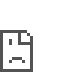
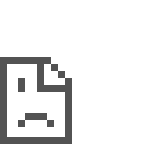
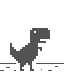
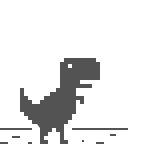
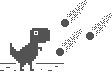
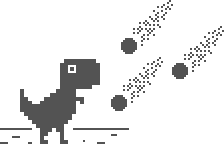
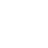
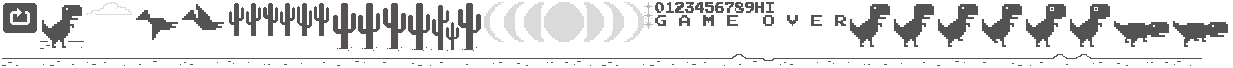
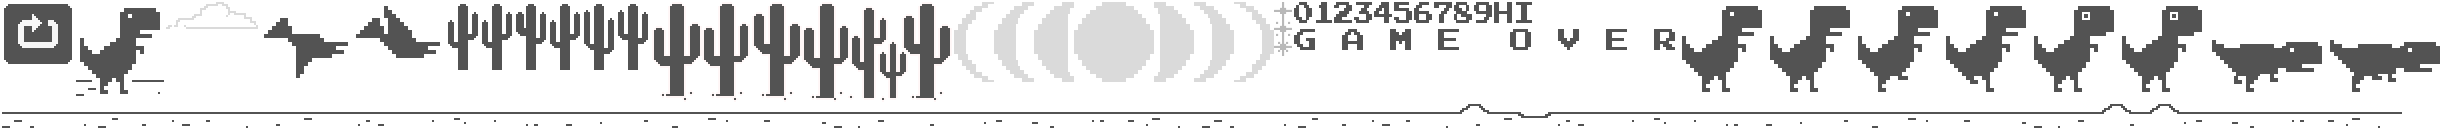

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"id","selector":"scbox"}
  (Session info: chrome=72.0.3626.121)
  (Driver info: chromedriver=2.46.628402 (536cd7adbad73a3783fdc2cab92ab2ba7ec361e1),platform=Windows NT 10.0.17763 x86_64)


In [13]:
%reset -f

# Download Chrome driver: https://sites.google.com/a/chromium.org/chromedriver/downloads

from selenium import webdriver
import time,os
from webdriver_manager.chrome import ChromeDriverManager #install the driver automatically

url = "file:///Users/eloi/Dropbox/Dojos/SeleniumDojo/files/hidden.html"
#browser = webdriver.Chrome("/Users/eloi/chromedriver") 

browser = webdriver.Chrome(ChromeDriverManager().install())
browser.get(url)
html=browser.page_source
print(html)
element = browser.find_element_by_id("scbox")
element.text

## The Cepstral demo: Automatation

Our new goal is to deal with dynamically generated data. Our goal is to be able to perform a web scraping as the following case. Cepstral is a text-to-speech provider. Let us check the web page.

In [29]:
from IPython.display import HTML
HTML('<iframe src="http://cepstral.com" width=700 height=350></iframe>')

Our goal is to retrieve the audio file that has been played using web scraping techniques. Let us check how can we do it.

In [18]:
%reset -f

# Download Chrome driver: https://sites.google.com/a/chromium.org/chromedriver/downloads

from selenium import webdriver
import time,os
from webdriver_manager.chrome import ChromeDriverManager #install the driver automatically

url = 'http://www.cepstral.com/en/demos' 
#browser = webdriver.Chrome("/Users/eloi/chromedriver") 

browser = webdriver.Chrome(ChromeDriverManager().install())


Checking for win32 chromedriver:2.46 in cache
Driver found in C:\Users\Orwell\.wdm\chromedriver\2.46\win32/chromedriver.exe


In [19]:
browser.get(url)

In [20]:
element = browser.find_element_by_id("demo_text")
element.clear()
s='My name is Selenium and I am so cool!!!'
element.send_keys(s)

In [21]:
browser.find_element_by_id('demo_submit').click()
browser.implicitly_wait(5) #set the TimeOut wait until 5 seconds 
browser.find_element_by_tag_name('audio') #find audio tag (it will wait until appears.)
html=browser.page_source #get page source 
browser.quit() #preventing the mp3 will we reproduced and deleted.

In [22]:
#Get the mp3 file
chunks=html.split('"')
for chunk in chunks:
    if '.mp3' in chunk:
        break
print (chunk)

/demos/audio/66ur448337t7t5lahafjtn3dc5.1552734866361.mp3


In [23]:
from urllib.parse import urljoin
furl=urljoin(url,chunk)
print (furl)

http://www.cepstral.com/demos/audio/66ur448337t7t5lahafjtn3dc5.1552734866361.mp3


In [24]:
import os

player = "mpv " 

##Replace with mplayer for Linux. 
#MPV has been installed in MAC OSX using homebrew.
#Mplayer has not been installed because of dependency troubles.
#brew tap mpv-player/mpv
#brew install --HEAD mpv-player/mpv/libass-ct
#brew install mpv

os.system(player+furl)

1

<div class = "alert alert-info" style = "border-radius:10px;border-width:3px;border-color:darkblue;font-family:Verdana,sans-serif;font-size:16px;">**Basic manipulation in Selenium:**
<p>
A webdriver instance allows to manipulate the web session, control cookies, retrieve the html code or find elements in the source code.
</p>
Given a webdriver instance (e.g.<span style = "font-family:Courier;">
            browser = webdriver.Firefox()</span>) the most relevant methods

<ul>
<li>**Open URL:**  .get(url) (e.g.
<span style = "font-family:Courier;"> browser.get(url)</span>)</li>
<li>**Selection: ** .find_element(s)... [element will return the first, elements the complete list]
<ul>
<li>..._by_link_text('foo') - find the link with text foo</li>
<li>..._by_partial_link_text() - similar to contains ...</li>
<li>..._by_css_selector()</li>
<li>..._by_tag_name()</li>
<li>..._by_xpath()</li>
<li>..._by_class_name()</li>
</ul>
</li>
<li>**Retrieve source: ** .page_source</li>
  
</ul>
</div>

<div class = "alert alert-info" style = "border-radius:10px;border-width:3px;border-color:darkblue;font-family:Verdana,sans-serif;font-size:16px;">**Element manipulation in Selenium:**
<p>
Consider the result of a selection, e.g. 

<span style = "font-family:Courier;">element = browser.find_element_by_tag_name('div')</span>

We can do several things on it.
<ul>
<li>element**.click()** - click on a selected element</li>
<li>Element properties:
<ul>
<li>element**.location**: x, y location</li>
<li>element**.parent**: parent element</li>
<li>element**.tag_name**: The tag of the element</li>
<li>element**.text**: text of the element and childs</li>
</ul>
</li>
   
</ul>




<div class = "alert alert-info" style = "border-radius:10px;border-width:3px;border-color:darkblue;font-family:Verdana,sans-serif;font-size:16px;">**Form input with Selenium:**
<ul>
<li> element**.send_keys()** - Keys, commands, arrows, etc </li>
<li> element**.clear()** - clear the element</li>
</ul>
<p>


</div>

<div class = "alert alert-info" style = "background-color:lightyellow;border-radius:10px;border-width:3px;border-color:darkorange;font-family:Verdana,sans-serif;font-size:16px;color:brown">**Other web driver utilities:**
<ul>
<li>browser.execute_script('window.close()') - execute any javascript on a load page</li>
<li>brosers.save_screenshot('foo.png')</li>
<li>browser.switch_to_alert(): handle pop-ups automatically</li>
<li>browser.forward() / browser.back(): navigation</li>
</ul>
</div>

<div class = "alert alert-info" style = "border-radius:10px;border-width:3px;border-color:darkblue;font-family:Verdana,sans-serif;font-size:16px;">**Scrolling and moving:**
Moving around the page is tricky, be prepared for displaying a little patience.

ActionChains provide a way of stringing together one or more actions and then implementing them.
<ul>
<li>move_by_offset(x,y)</li>
<li>move_to_element() - for highlighting, hovering, rollover, etc.</li>
<li>move_to_elemnte_by_offset(elem, x, y)</li>
</ul>
</div>

<div class = "alert alert-info" style = "border-radius:10px;border-width:3px;border-color:darkblue;font-family:Verdana,sans-serif;font-size:16px;"> **Wait**

We can distinguish two types of waiting strategies, namely, implicit and explicit waits.

*Implicit waits* set up a timeout that will last for the full life of the web driver. On the other hand, *explicit waits* tell the driver to poll the DOM until some condition is met, e.g. a certain element has finished loading on the page. 

Example:
<p style="font-family:Courier;">
try: <br>
movie_info = webdriverwait(browser,10).until(EC.element_to_be_clickable((By.ID,'BotMovie')))<br>
title = movie_info.find_element_by_class_name('title').text<br>
link = movie_info.find_element_by_class_name('mdpLink').get_attribute('href')<br>
except:<br>
 print 'taking too long!!'<br>
 </p>
 
*EC* stands for Expected Condition and are the basis of explicit waits (see http://selenium-python.readthedocs.org for more information)
</div>


<div class = "alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">
**Selenium EXERCISE 1:** <BR>
<ul>
<li> Open a browser 

<li>Go to tripadvisor/Restaurants

<li>Find the search text box

<li>Clear it, input the query "Barcelona" and send it

<li>Go to "Restarurants" and get all the links and names of top 10 restaurants in Sant cugat
</ul>

</div>

In [99]:
from selenium import webdriver
browser = webdriver.Chrome(ChromeDriverManager().install())
browser.get("https://www.tripadvisor.es/Restaurants")




Checking for mac64 chromedriver:2.46 in cache
Driver found in /Users/eloi/.wdm/chromedriver/2.46/mac64/chromedriver


<div class = "alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">
**Selenium EXERCISE 2:** <BR>
<ul>
<li> Open a browser 

<li>Go to 'http://www.cinemeseixmacia.com/'

<li>Find all the movies for today between 18:00 and 20:00, and classifacation rate 16

<li>Print for each movie title a link to a search using google inside imdb site. For example:
    https://www.google.es/search?q=animales%20fant%C3%A1sticos%3A%20los%20cr%C3%ADmenes%20de%20grindelwald%20site%3Aimdb.com
    (to create a valid URL from a string use `urllib.parse.quote` method)

<li> Click to the youtube trailer of the first retrived movie 
</ul>

</div>

In [ ]:
from selenium import webdriver
browser = webdriver.Chrome(ChromeDriverManager().install())
browser.get("http://www.cinemeseixmacia.com/")

